# Outliers Detection & Treatement in Data Science/ ML

## What are Outliers?
Values distant from most other values.
For example, in a dataset of employee salaries, a CEO's salary would likely be an outlier, but it's a valid and important data point.

![](https://articles.outlier.org/_next/image?url=https%3A%2F%2Fimages.ctfassets.net%2Fkj4bmrik9d6o%2FcESitsCxzL2ijivbNwiW6%2Fde9421d4c144e5a5c23c35941931c83f%2FOutlier_Graph_CalculateOutlierFormula-01.png&w=1080&q=75)

### Why we should handle outliers?
1. Distortion of Statistical Measures
2. Impact on Machine Learning Models
3. Misleading Conclusions and Decisions

![](https://miro.medium.com/v2/resize:fit:600/format:webp/0*5KzEJ3MC172iPGxO.jpg)

Image Credit: https://miro.medium.com/v2/resize:fit:600/format:webp/0*5KzEJ3MC172iPGxO.jpg

### When outliers are important?
1. **Anomalies detection** - For example, in medical data, an outlier might indicate a rare disease or a unique response to treatment.
2. Fraud detection
3. Network intrusion detection

## How to Detect Outliers?
1. Graphical Methods
  - Boxplot
  - Histogram
  - scatterplot (bivariate outliers)
2. Statistical Methods
  - Z-Score (Normally distributed data)
  - IQR (Interquartile Range) - Skewed data
3. Machine Learning Techniques
  - Isolation Forest, DBSCAN, or clustering algorithms

## How to Treat Outliers?
1. Remove Outliers
  - If due to data entry errors or irrelevant records.
  - Use filtering conditions.
2. Cap/Floor (Winsorization)
  - Replace extreme values with nearest threshold.
3. Imputation
  - Replace with mean, median, or a model-based prediction.
4. Data Transformation
  - log transformation - log(x)
  - sqaure root transformation - sqrt(x)
  - reciprocal transformation - (1/x)
  - power transformation - BoxCox transformation

### Data Preparation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv("NHANES Weight and Height.csv")

In [5]:
df.head()

,Unnamed: 0,Weight (kg),Standing Height (cm),BMI(kg/m**2)
0,0,97.1,160.2,37.8
1,1,98.8,182.3,29.7
2,2,74.3,184.2,21.9
3,3,103.7,185.3,30.2
4,4,83.3,177.1,26.6


In [6]:
df.shape

(8388, 4)

## How to Detect Outliers?
1. Graphical Methods
  - Boxplot
  - Histogram
  - scatterplot (bivariate outliers)
2. Statistical Methods
  - Z-Score (Normally distributed data)
  - IQR (Interquartile Range) - Skewed data
3. Machine Learning Techniques
  - Isolation Forest, DBSCAN, or clustering algorithms

### 1. Graphical Methods

#### Boxplot

In [7]:
df.columns

Index(['Unnamed: 0', 'Weight (kg)', 'Standing Height (cm)', 'BMI(kg/m**2)'], dtype='object')

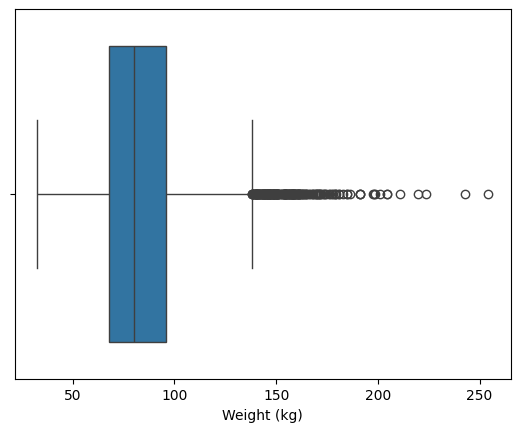

In [8]:
sns.boxplot(data = df, x = "Weight (kg)")
plt.show()

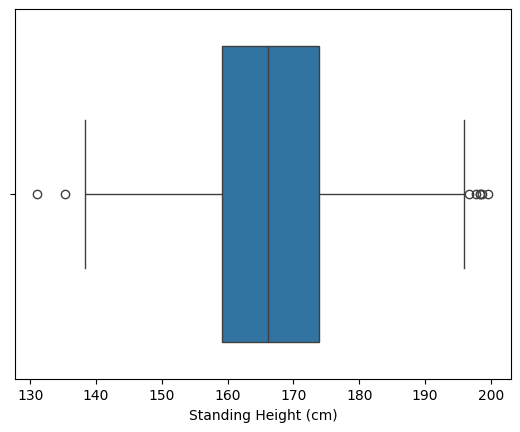

In [9]:
sns.boxplot(data = df, x = "Standing Height (cm)")
plt.show()

#### Histogram

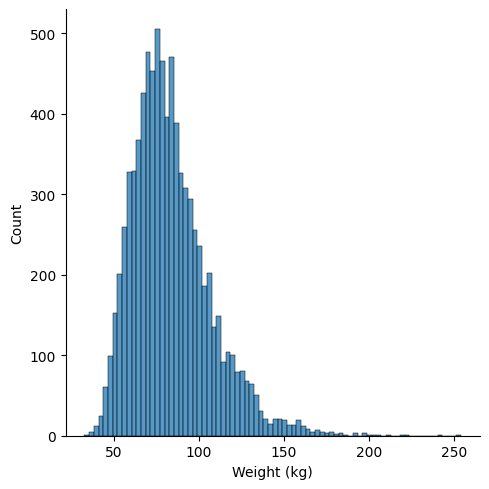

In [10]:
sns.displot(data = df, x = "Weight (kg)", kind = "hist")
plt.show()

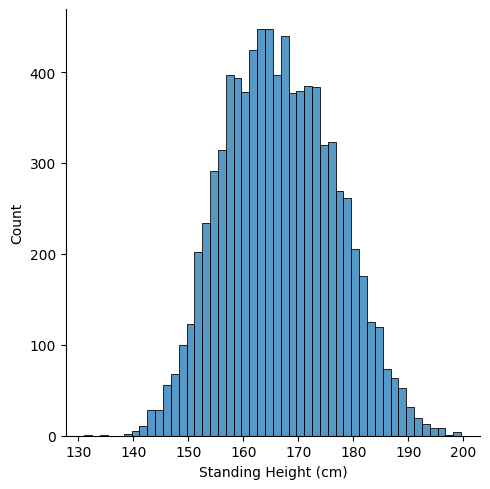

In [11]:
sns.displot(data = df, x = "Standing Height (cm)", kind = "hist")
plt.show()

#### Scatterplot

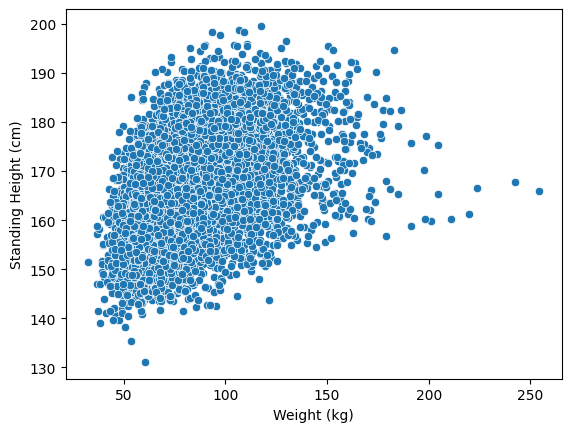

In [12]:
sns.scatterplot(data = df, x = "Weight (kg)", y = "Standing Height (cm)")
plt.show()

### 2. Statistical methods
- Z-Score (Normally distributed data)
- IQR (Interquartile Range) - Skewed data

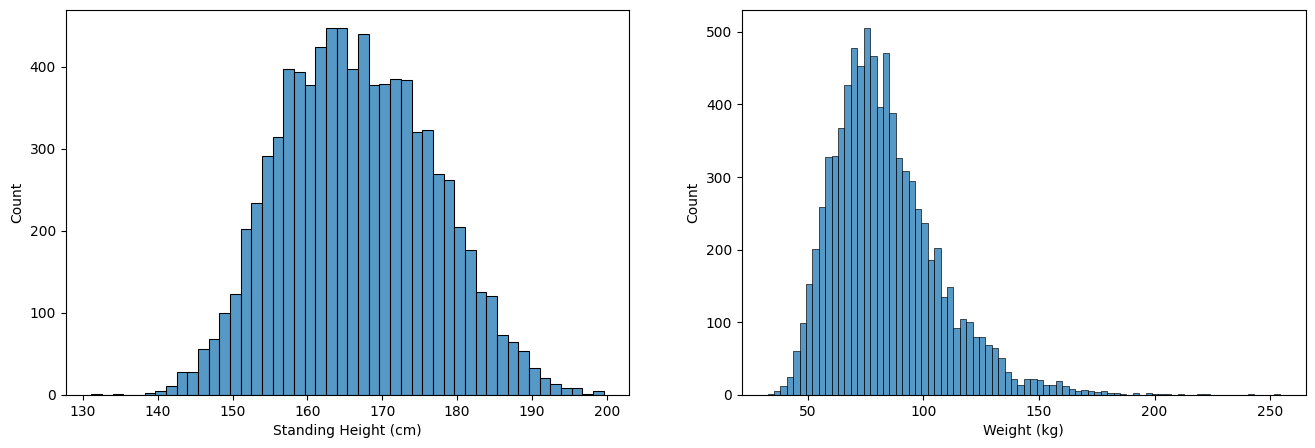

In [13]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['Standing Height (cm)'])

plt.subplot(1,2,2)
sns.histplot(df['Weight (kg)'])

plt.show()

In [14]:
df.skew()

Unnamed: 0              0.000000
Weight (kg)             1.129603
Standing Height (cm)    0.142496
BMI(kg/m**2)            1.353043
dtype: float64

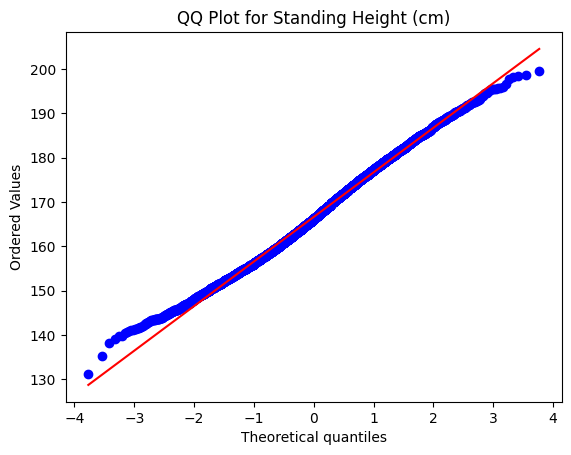

In [15]:
stats.probplot(df['Standing Height (cm)'], dist="norm", plot=plt)
plt.title("QQ Plot for Standing Height (cm)")
plt.show()

### Z-Score
**How many standard deviations a data point is away from the mean**

**z = (x - μ) / σ**

**x = μ + zσ**

**If datapoint is 3 standard deviations away from mean, consider it as outlier**

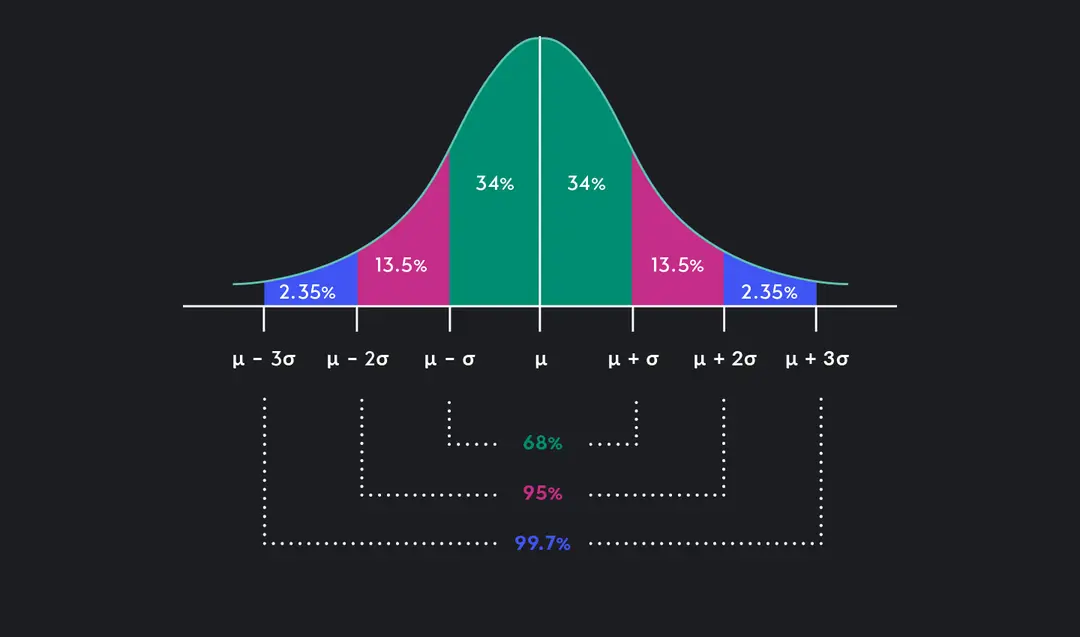
image credit: https://articles.outlier.org/z-score-formula-examples-and-how-to-interpret

In [16]:
zscore_height = stats.zscore(df["Standing Height (cm)"])

In [17]:
zscore_height

array([-0.63910757,  1.55369806,  1.74221981, ...,  0.20427921,
        0.96828842,  0.08521284], shape=(8388,))

In [18]:
df1 = df.copy()

In [19]:
df1["Z Score Height"] = zscore_height

In [20]:
df1

,Unnamed: 0,Weight (kg),Standing Height (cm),BMI(kg/m**2),Z Score Height
0,0,97.1,160.2,37.8,-0.639108
1,1,98.8,182.3,29.7,1.553698
2,2,74.3,184.2,21.9,1.742220
3,3,103.7,185.3,30.2,1.851364
4,4,83.3,177.1,26.6,1.037744
...,...,...,...,...,...
8383,8383,94.3,178.8,29.5,1.206421
8384,8384,82.8,147.8,37.9,-1.869460
8385,8385,108.8,168.7,38.2,0.204279
8386,8386,79.5,176.4,25.5,0.968288


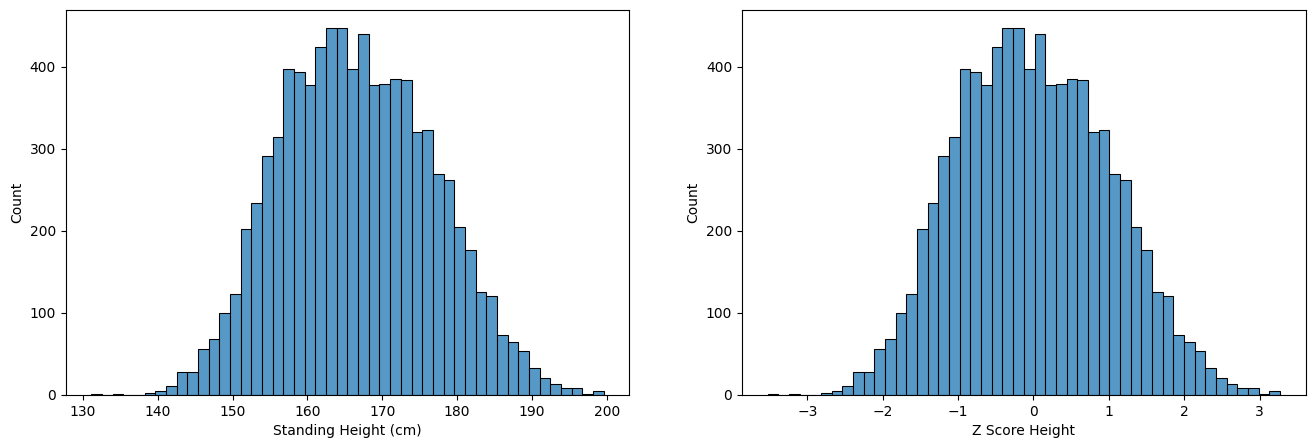

In [21]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df1['Standing Height (cm)'])

plt.subplot(1,2,2)
sns.histplot(df1['Z Score Height'])

plt.show()

In [22]:
(zscore_height < -3) | (zscore_height > 3)

array([False, False, False, ..., False, False, False], shape=(8388,))

In [23]:
df1[(zscore_height < -3) | (zscore_height > 3)]

,Unnamed: 0,Weight (kg),Standing Height (cm),BMI(kg/m**2),Z Score Height
60,60,106.8,198.7,27.1,3.180938
1906,1906,53.8,135.3,29.4,-3.109735
2165,2165,60.3,131.1,35.1,-3.526467
3379,3379,97.5,197.7,24.9,3.081716
4026,4026,93.6,198.4,23.8,3.151172
5815,5815,109.1,198.3,27.7,3.141250
7576,7576,117.4,199.6,29.5,3.270238


In [24]:
# x = mean + z * std
# x_lower = mean - 3 * std
# x_upper = mean + 3 * std

In [25]:
x_lower = df["Standing Height (cm)"].mean() - 3 * df["Standing Height (cm)"].std() 
x_upper = df["Standing Height (cm)"].mean() + 3 * df["Standing Height (cm)"].std() 
x_lower, x_upper

(np.float64(136.4041494142272), np.float64(196.87823017566316))

In [26]:
(df["Standing Height (cm)"]<x_lower) | (df["Standing Height (cm)"]>x_upper)

0       False
1       False
2       False
3       False
4       False
        ...  
8383    False
8384    False
8385    False
8386    False
8387    False
Name: Standing Height (cm), Length: 8388, dtype: bool

In [27]:
df[(df["Standing Height (cm)"]<x_lower) | (df["Standing Height (cm)"]>x_upper)]

,Unnamed: 0,Weight (kg),Standing Height (cm),BMI(kg/m**2)
60,60,106.8,198.7,27.1
1906,1906,53.8,135.3,29.4
2165,2165,60.3,131.1,35.1
3379,3379,97.5,197.7,24.9
4026,4026,93.6,198.4,23.8
5815,5815,109.1,198.3,27.7
7576,7576,117.4,199.6,29.5


#### IQR (Interquartile Range) - Skewed data

1. Calculate the IQR: The interquartile range is the difference between the third quartile (Q3) and the first quartile (Q1) of the data.
2. Determine the outlier boundaries:
  - minimum: Q1 - (1.5 * IQR)
  - maximum: Q3 + (1.5 * IQR)
3. Identify outliers: Any data point below the lower bound or above the upper bound is considered an outlier.

![Boxplot](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*0MPDTLn8KoLApoFvI0P2vQ.png)
Image Source: https://miro.medium.com/v2/resize:fit:1100/format:webp/1*0MPDTLn8KoLApoFvI0P2vQ.png

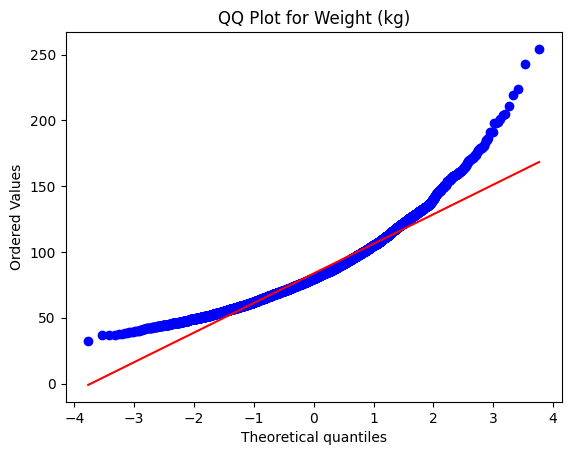

In [28]:
stats.probplot(df['Weight (kg)'], dist="norm", plot=plt)
plt.title("QQ Plot for Weight (kg)")
plt.show()

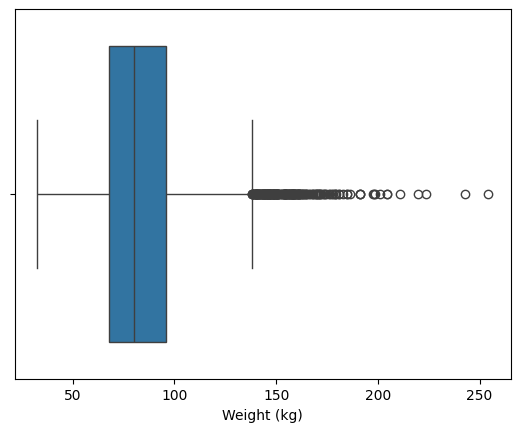

In [29]:
sns.boxplot(data= df, x = "Weight (kg)")
plt.show()

In [30]:
q1 = df["Weight (kg)"].quantile(0.25)
q3 = df["Weight (kg)"].quantile(0.75)
iqr = q3-q1

In [31]:
q1,q3,iqr

(np.float64(67.6), np.float64(95.8), np.float64(28.200000000000003))

In [32]:
minimum = q1 - 1.5*iqr
maximum = q3 + 1.5*iqr
minimum, maximum

(np.float64(25.29999999999999), np.float64(138.1))

In [33]:
(df["Weight (kg)"] < minimum) | (df["Weight (kg)"] > maximum)

0       False
1       False
2       False
3       False
4       False
        ...  
8383    False
8384    False
8385    False
8386    False
8387    False
Name: Weight (kg), Length: 8388, dtype: bool

In [34]:
df[(df["Weight (kg)"] < minimum) | (df["Weight (kg)"] > maximum)]

,Unnamed: 0,Weight (kg),Standing Height (cm),BMI(kg/m**2)
34,34,138.2,172.9,46.2
36,36,138.7,158.7,55.1
86,86,143.4,182.0,43.3
94,94,191.4,175.8,61.9
100,100,140.4,175.9,45.4
...,...,...,...,...
8170,8170,166.6,174.7,54.6
8204,8204,143.7,185.4,41.8
8233,8233,173.0,183.6,51.3
8328,8328,144.6,172.8,48.4


### 3. Machine Learning Techniques
- Isolation Forest
- DBSCAN
- Clustering Algorithms

## How to Treat Outliers?
1. Remove Outliers
  - If due to data entry errors or irrelevant records.
  - Use filtering conditions.
2. Cap/Floor (Winsorization)
  - Replace extreme values with nearest threshold.
3. Imputation
  - Replace with mean, median, or a model-based prediction.
4. Data Transformation
  - log transformation - log(x)
  - sqaure root transformation - sqrt(x)
  - reciprocal transformation - (1/x)
  - power transformation - BoxCox transformation
  

#### 1. Remove Outliers (trimming)

In [35]:
# Zcores
zscore_height

array([-0.63910757,  1.55369806,  1.74221981, ...,  0.20427921,
        0.96828842,  0.08521284], shape=(8388,))

In [36]:
(zscore_height < -3) | (zscore_height > 3)

array([False, False, False, ..., False, False, False], shape=(8388,))

In [37]:
(zscore_height >= -3) & (zscore_height <= 3)

array([ True,  True,  True, ...,  True,  True,  True], shape=(8388,))

In [38]:
df[(zscore_height >= -3) & (zscore_height <= 3)]

,Unnamed: 0,Weight (kg),Standing Height (cm),BMI(kg/m**2)
0,0,97.1,160.2,37.8
1,1,98.8,182.3,29.7
2,2,74.3,184.2,21.9
3,3,103.7,185.3,30.2
4,4,83.3,177.1,26.6
...,...,...,...,...
8383,8383,94.3,178.8,29.5
8384,8384,82.8,147.8,37.9
8385,8385,108.8,168.7,38.2
8386,8386,79.5,176.4,25.5


In [53]:
# iqr

In [54]:
minimum, maximum

(np.float64(25.29999999999999), np.float64(138.1))

In [55]:
df.columns

Index(['Unnamed: 0', 'Weight (kg)', 'Standing Height (cm)', 'BMI(kg/m**2)'], dtype='object')

In [56]:
df[(df["Weight (kg)"]<minimum) | (df["Weight (kg)"]>maximum)]

,Unnamed: 0,Weight (kg),Standing Height (cm),BMI(kg/m**2)
34,34,138.2,172.9,46.2
36,36,138.7,158.7,55.1
86,86,143.4,182.0,43.3
94,94,191.4,175.8,61.9
100,100,140.4,175.9,45.4
...,...,...,...,...
8170,8170,166.6,174.7,54.6
8204,8204,143.7,185.4,41.8
8233,8233,173.0,183.6,51.3
8328,8328,144.6,172.8,48.4


In [60]:
df2 = df[(df["Weight (kg)"]>=minimum) & (df["Weight (kg)"]<=maximum)]

In [61]:
df2[(df2["Weight (kg)"]<minimum) | (df2["Weight (kg)"]>maximum)]

,Unnamed: 0,Weight (kg),Standing Height (cm),BMI(kg/m**2)


In [62]:
df2

,Unnamed: 0,Weight (kg),Standing Height (cm),BMI(kg/m**2)
0,0,97.1,160.2,37.8
1,1,98.8,182.3,29.7
2,2,74.3,184.2,21.9
3,3,103.7,185.3,30.2
4,4,83.3,177.1,26.6
...,...,...,...,...
8383,8383,94.3,178.8,29.5
8384,8384,82.8,147.8,37.9
8385,8385,108.8,168.7,38.2
8386,8386,79.5,176.4,25.5


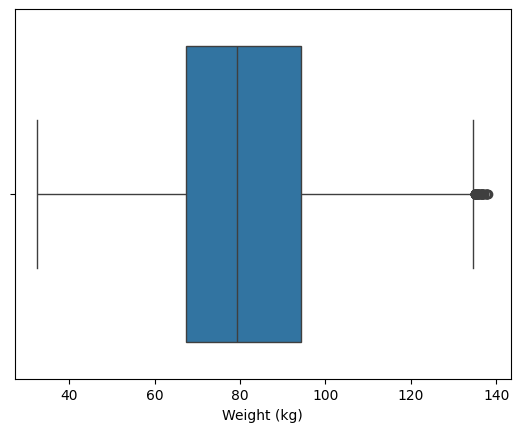

In [63]:
sns.boxplot(data = df2, x = "Weight (kg)")
plt.show()

**NOTE**: After removing the outliers, if you plot the boxplot again, you may still notice some outliers. This can occur because, for the remaining data, Q1 and Q3 will change, and a new IQR will be calculated, which may in turn alter the whisker values.

### 2. Cap/Floor (Winsorization)

In [79]:
# IQR

In [80]:
minimum, maximum

(np.float64(25.29999999999999), np.float64(138.1))

In [81]:
df3 = df.copy()

In [85]:
df3["Weight (kg)"] = df3["Weight (kg)"].clip(lower = minimum, upper = maximum)

In [86]:
df3[(df3['Weight (kg)'] > maximum) | (df3['Weight (kg)'] < minimum)]

,Unnamed: 0,Weight (kg),Standing Height (cm),BMI(kg/m**2)


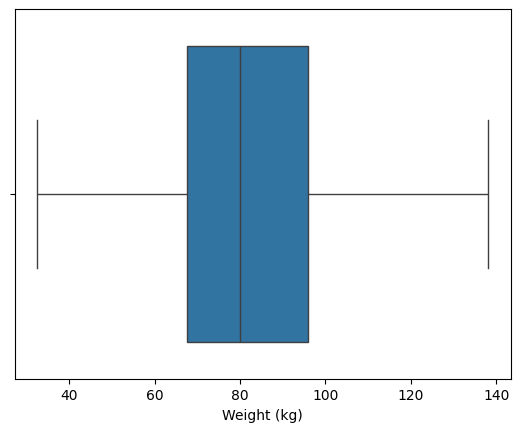

In [87]:
sns.boxplot(data = df3, x = "Weight (kg)")
plt.show()

In [88]:
# Zscore

In [89]:
x_lower, x_upper

(np.float64(136.4041494142272), np.float64(196.87823017566316))

In [90]:
df4 = df.copy()
df4["Standing Height (cm)"] = df4['Standing Height (cm)'].clip(lower=x_lower, upper=x_upper)

In [91]:
df4[(df4['Standing Height (cm)'] > x_upper) | (df4['Standing Height (cm)'] < x_lower)]

,Unnamed: 0,Weight (kg),Standing Height (cm),BMI(kg/m**2)


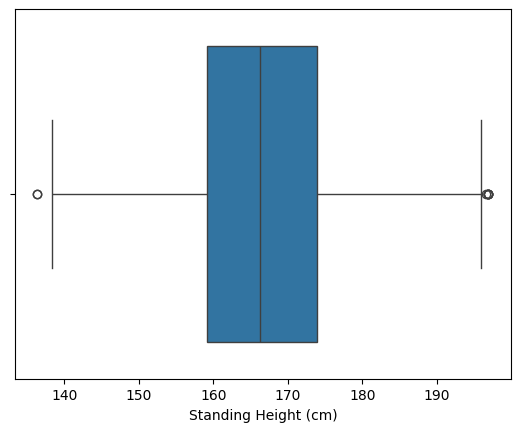

In [92]:
sns.boxplot(data = df4, x = "Standing Height (cm)")
plt.show()

In [94]:
# winsorization (percentile)

In [95]:
df5 = df.copy()

In [98]:
lower_percentile = df5["Weight (kg)"].quantile(0.02)
upper_percentile = df5["Weight (kg)"].quantile(0.98)
lower_percentile, upper_percentile

(np.float64(48.7), np.float64(143.72600000000003))

In [99]:
df5["Weight (kg)"] = df5["Weight (kg)"].clip(lower = lower_percentile, upper = upper_percentile)

### 3. Imputation

In [100]:
df6 = df.copy()

In [107]:
# IQR
minimum, maximum

(np.float64(25.29999999999999), np.float64(138.1))

In [112]:
median = df6["Weight (kg)"].median()
median

np.float64(79.9)

In [109]:
df6[(df6["Weight (kg)"] < minimum) | (df6["Weight (kg)"] > maximum)]

,Unnamed: 0,Weight (kg),Standing Height (cm),BMI(kg/m**2)
34,34,138.2,172.9,46.2
36,36,138.7,158.7,55.1
86,86,143.4,182.0,43.3
94,94,191.4,175.8,61.9
100,100,140.4,175.9,45.4
...,...,...,...,...
8170,8170,166.6,174.7,54.6
8204,8204,143.7,185.4,41.8
8233,8233,173.0,183.6,51.3
8328,8328,144.6,172.8,48.4


In [111]:
df6.loc[(df6["Weight (kg)"] < minimum) | (df6["Weight (kg)"] > maximum), "Weight (kg)"] = median

In [113]:
df6[(df6['Weight (kg)'] > maximum) | (df6['Weight (kg)'] < minimum)]

,Unnamed: 0,Weight (kg),Standing Height (cm),BMI(kg/m**2)


### 4. Data Transformation
  - log transformation - log(x)
  - sqaure root transformation - sqrt(x)
  - reciprocal transformation - (1/x)
  - power transformation - BoxCox transformation

In [115]:
df7 = df.copy()

In [116]:
df7["Weight (kg)"]

0        97.1
1        98.8
2        74.3
3       103.7
4        83.3
        ...  
8383     94.3
8384     82.8
8385    108.8
8386     79.5
8387     59.7
Name: Weight (kg), Length: 8388, dtype: float64

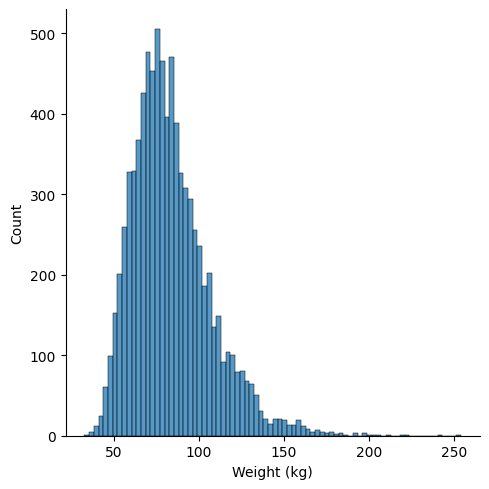

In [117]:
sns.displot(df7["Weight (kg)"])
plt.show()

In [119]:
df7["Weight (kg)"] = np.log(df7["Weight (kg)"])

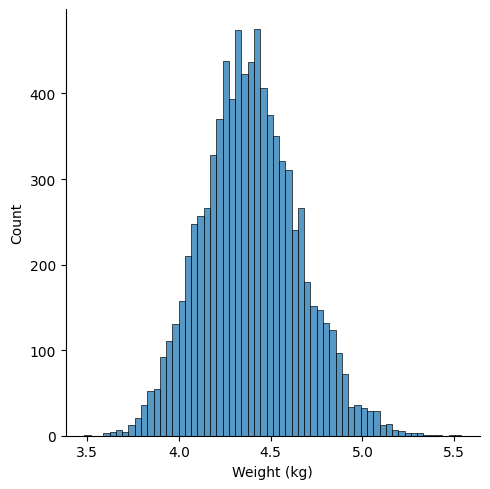

In [120]:
sns.displot(df7["Weight (kg)"])
plt.show()